In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('train.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# Check for missing values
print(df.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [6]:
# Basic data exploration
print(df['season'].value_counts())
print(df['weather'].value_counts())

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


# Feature Engineering

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['Day'] = df['datetime'].dt.day
df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month
df['Hour'] = df['datetime'].dt.hour

df.drop('datetime',axis=1,inplace=True)

# Visualization 

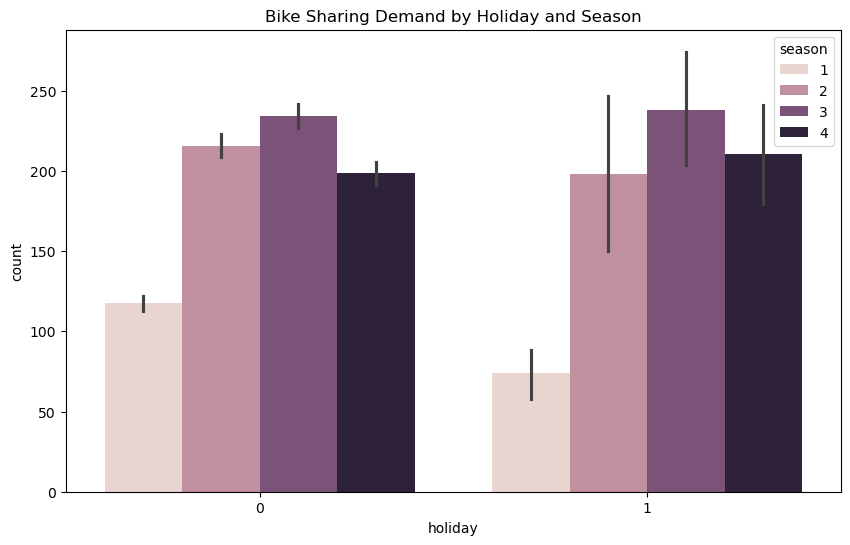

In [8]:
# Visualizing count by holiday and season
plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='count', data=df, hue='season')
plt.title('Bike Sharing Demand by Holiday and Season')
plt.show()

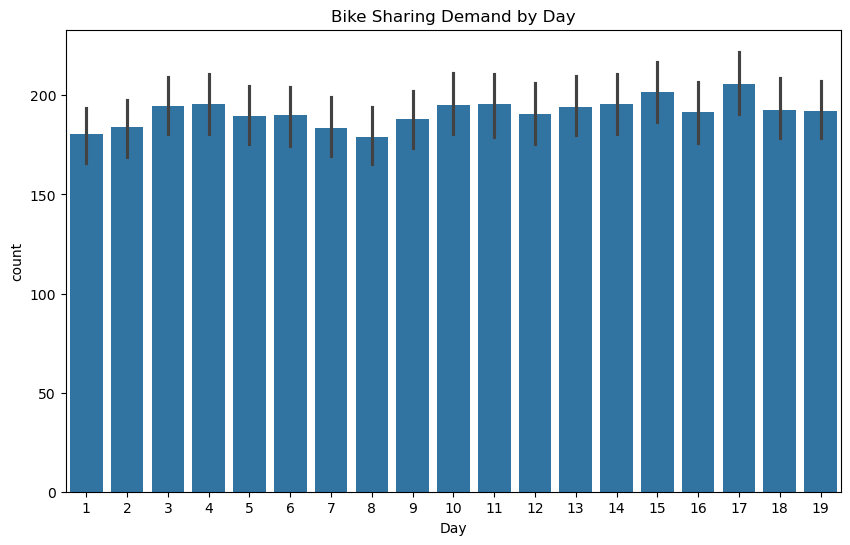

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='count', data=df)
plt.title('Bike Sharing Demand by Day')
plt.show()

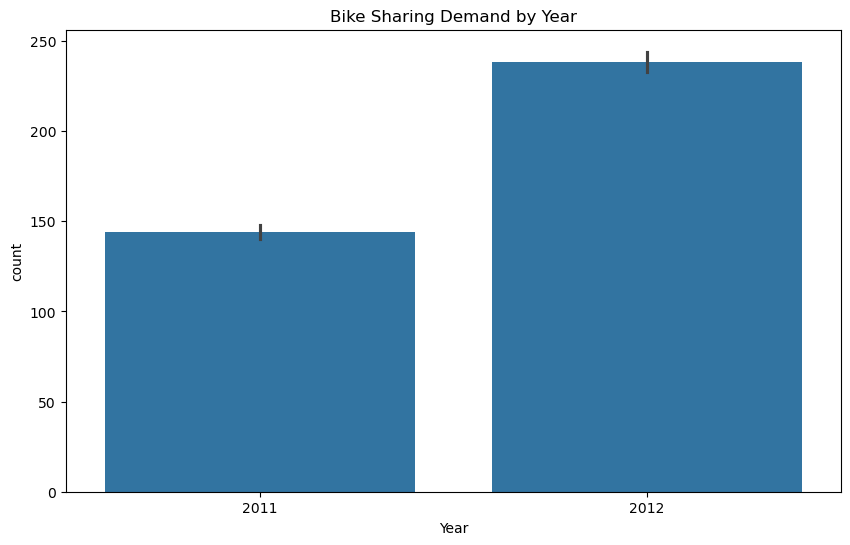

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='count', data=df)
plt.title('Bike Sharing Demand by Year')
plt.show()

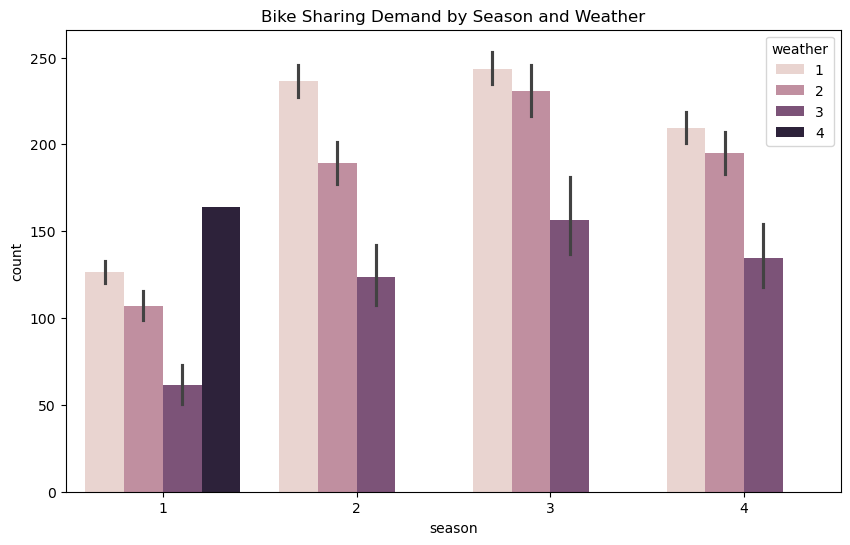

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', data=df, hue='weather')
plt.title('Bike Sharing Demand by Season and Weather')
plt.show()

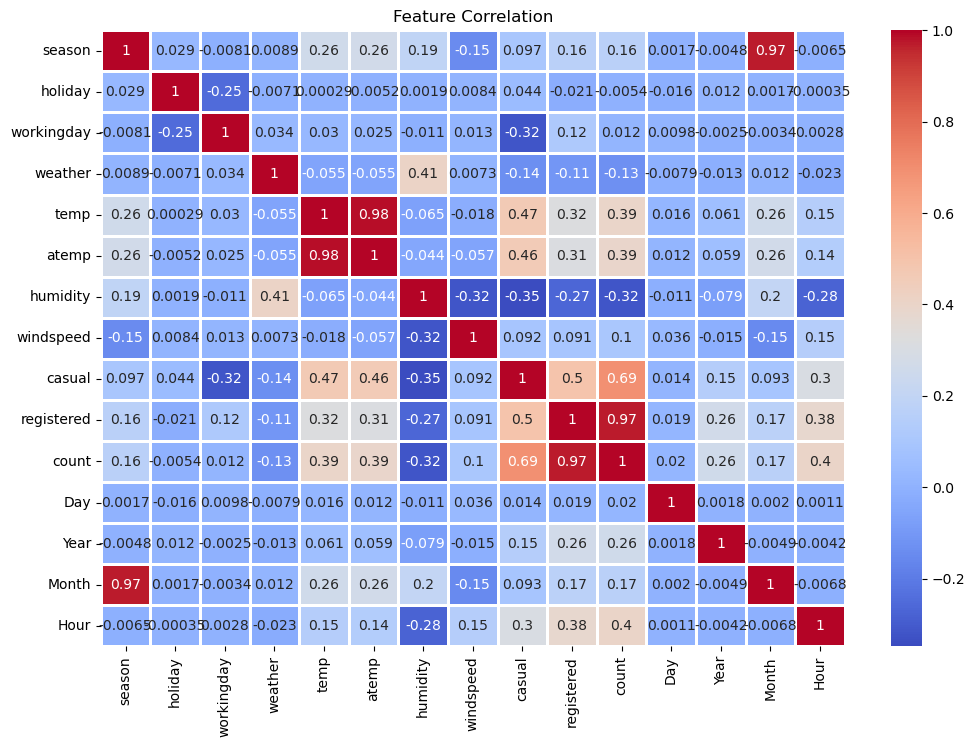

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.8, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [13]:
df.drop(columns=['Month', 'atemp', 'casual', 'registered'], inplace=True)

# Modeling

In [14]:
# Split data into features (X) and target (y)
X = df.drop('count', axis=1)
y = df['count']

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the DecisionTreeRegressor and define hyperparameters for GridSearch
tree = DecisionTreeRegressor()
param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Set up GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)

# Fit the model and get the best parameters
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


In [ ]:
# Train the model using the best parameters
tree = DecisionTreeRegressor(criterion='squared_error',
                             max_depth=20, max_features=None,
                             min_samples_leaf=5,
                             min_samples_split=20
                            )
tree.fit(X_train, y_train)


In [ ]:
# Evaluate the model on training data
train_prediction = tree.predict(X_train)
print("Train Set Evaluation:")
print("\tRMSE:", np.sqrt(mean_squared_error(y_train, train_prediction)))
print("\tR2 score:", r2_score(y_train, train_prediction))

In [ ]:
# Evaluate the model on testing data
test_prediction = tree.predict(X_test)
print("Test Set Evaluation:")
print("\tRMSE:", np.sqrt(mean_squared_error(y_test, test_prediction)))
print("\tR2 score:", r2_score(y_test, test_prediction))

In [ ]:
# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_prediction, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Bike Sharing Demand')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()